In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [45]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [46]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202348          7   8202     5115   11289      12           7   
1     202347          7   6586     4308    8864      10           7   
2     202346          7   5223     2968    7478       8           5   
3     202345          7   5007     2675    7339       8           4   
4     202344          7   3688     1664    5712       6           3   
5     202343          7   3891     1675    6107       6           3   
6     202342          7   3968     1212    6724       6           2   
7     202341          7   3356     1764    4948       5           3   
8     202340          7   2845     1410    4280       4           2   
9     202339          7   1739      629    2849       3           1   
10    202338          7   1663      274    3052       3           1   
11    202337          7   1122      223    2021       2           1   
12    202336          7    726       10    1442       1           0   
13    202335          7    961       96    1826       1           0   
14    202334          7   1168        9    2327       2           0   
15    202333          7   3308     1184    5432       5           2   
16    202332          7   7996     1120   14872      12           2   
17    202331          7   3318     1398    5238       5           2   
18    202330          7   5821     3269    8373       9           5   
19    202329          7  13558     8297   18819      20          12   
20    202328          7   6700     4043    9357      10           6   
21    202327          7   7253     4599    9907      11           7   
22    202326          7   9192     6223   12161      14          10   
23    202325          7  11498     8257   14739      17          12   
24    202324          7  11115     7968   14262      17          12   
25    202323          7  12563     6134   18992      19           9   
26    202322          7  12184     8125   16243      18          12   
27    202321          7  11349     7598   15100      17          11   
28    202320          7   9000     4615   13385      14           7   
29    202319          7   9344     6091   12597      14           9   
...      ...        ...    ...      ...     ...     ...         ...   
1692  199126          7  17608    11304   23912      31          20   
1693  199125          7  16169    10700   21638      28          18   
1694  199124          7  16171    10071   22271      28          17   
1695  199123          7  11947     7671   16223      21          13   
1696  199122          7  15452     9953   20951      27          17   
1697  199121          7  14903     8975   20831      26          16   
1698  199120          7  19053    12742   25364      34          23   
1699  199119          7  16739    11246   22232      29          19   
1700  199118          7  21385    13882   28888      38          25   
1701  199117          7  13462     8877   18047      24          16   
1702  199116          7  14857    10068   19646      26          18   
1703  199115          7  13975     9781   18169      25          18   
1704  199114          7  12265     7684   16846      22          14   
1705  199113          7   9567     6041   13093      17          11   
1706  199112          7  10864     7331   14397      19          13   
1707  199111          7  15574    11184   19964      27          19   
1708  199110          7  16643    11372   21914      29          20   
1709  199109          7  13741     8780   18702      24          15   
1710  199108          7  13289     8813   17765      23          15   
1711  199107          7  12337     8077   16597      22          15   
1712  199106          7  10877     7013   14741      19          12   
1713  199105          7  10442     6544   14340      18          11   
1714  199104          7   7913     4563   11263      14           8   
1715  199103          7  15387    10484   20290      27          18   
1716  199102          7  16277  

In [47]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [48]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202348          7   8202     5115   11289      12           7   
1     202347          7   6586     4308    8864      10           7   
2     202346          7   5223     2968    7478       8           5   
3     202345          7   5007     2675    7339       8           4   
4     202344          7   3688     1664    5712       6           3   
5     202343          7   3891     1675    6107       6           3   
6     202342          7   3968     1212    6724       6           2   
7     202341          7   3356     1764    4948       5           3   
8     202340          7   2845     1410    4280       4           2   
9     202339          7   1739      629    2849       3           1   
10    202338          7   1663      274    3052       3           1   
11    202337          7   1122      223    2021       2           1   
12    202336          7    726       10    1442       1           0   
13    202335          7    961       96    1826       1           0   
14    202334          7   1168        9    2327       2           0   
15    202333          7   3308     1184    5432       5           2   
16    202332          7   7996     1120   14872      12           2   
17    202331          7   3318     1398    5238       5           2   
18    202330          7   5821     3269    8373       9           5   
19    202329          7  13558     8297   18819      20          12   
20    202328          7   6700     4043    9357      10           6   
21    202327          7   7253     4599    9907      11           7   
22    202326          7   9192     6223   12161      14          10   
23    202325          7  11498     8257   14739      17          12   
24    202324          7  11115     7968   14262      17          12   
25    202323          7  12563     6134   18992      19           9   
26    202322          7  12184     8125   16243      18          12   
27    202321          7  11349     7598   15100      17          11   
28    202320          7   9000     4615   13385      14           7   
29    202319          7   9344     6091   12597      14           9   
...      ...        ...    ...      ...     ...     ...         ...   
1692  199126          7  17608    11304   23912      31          20   
1693  199125          7  16169    10700   21638      28          18   
1694  199124          7  16171    10071   22271      28          17   
1695  199123          7  11947     7671   16223      21          13   
1696  199122          7  15452     9953   20951      27          17   
1697  199121          7  14903     8975   20831      26          16   
1698  199120          7  19053    12742   25364      34          23   
1699  199119          7  16739    11246   22232      29          19   
1700  199118          7  21385    13882   28888      38          25   
1701  199117          7  13462     8877   18047      24          16   
1702  199116          7  14857    10068   19646      26          18   
1703  199115          7  13975     9781   18169      25          18   
1704  199114          7  12265     7684   16846      22          14   
1705  199113          7   9567     6041   13093      17          11   
1706  199112          7  10864     7331   14397      19          13   
1707  199111          7  15574    11184   19964      27          19   
1708  199110          7  16643    11372   21914      29          20   
1709  199109          7  13741     8780   18702      24          15   
1710  199108          7  13289     8813   17765      23          15   
1711  199107          7  12337     8077   16597      22          15   
1712  199106          7  10877     7013   14741      19          12   
1713  199105          7  10442     6544   14340      18          11   
1714  199104          7   7913     4563   11263      14           8   
1715  199103          7  15387    10484   20290      27          18   
1716  199102          7  16277  

In [49]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [50]:
 sorted_data = data.set_index('period').sort_index()

In [51]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

In [52]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2023-05-08/2023-05-14  202319          7   9344     6091   12597      14   
2023-05-15/2023-05-21  202320          7   9000     4615   13385      14   
2023-05-22/2023-05-28  202321          7  11349     7598   15100      17   
2023-05-29/2023-06-04  202322          7  12184     8125   16243      18   
2023-06-05/2023-06-11  202323          7  12563     6134   18992      19   
2023-06-12/2023-06-18  202324          7  11115     7968   14262      17   
2023-06-19/2023-06-25  202325          7  11498     8257   14739      17   
2023-06-26/2023-07-02  202326          7   9192     6223   12161      14   
2023-07-03/2023-07-09  202327          7   7253     4599    9907      11   
2023-07-10/2023-07-16  202328          7   6700     4043    9357      10   
2023-07-17/2023-07-23  202329          7  13558     8297   18819      20   
2023-07-24/2023-07-30  202330          7   5821     3269    8373       9   
2023-07-31/2023-08-06  202331          7   3318     1398    5238       5   
2023-08-07/2023-08-13  202332          7   7996     1120   14872      12   
2023-08-14/2023-08-20  202333          7   3308     1184    5432       5   
2023-08-21/2023-08-27  202334          7   1168        9    2327       2   
2023-08-28/2023-09-03  202335          7    961       96    1826       1   
2023-09-04/2023-09-10  202336          7    726       10    1442       1   
2023-09-11/2023-09-17  202337          7   1122      223    2021       2   
2023-09-18/2023-09-24  202338          7   1663      274    3052       3 

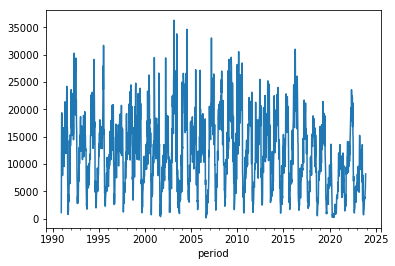

In [53]:
pd.to_numeric(sorted_data['inc']).plot()

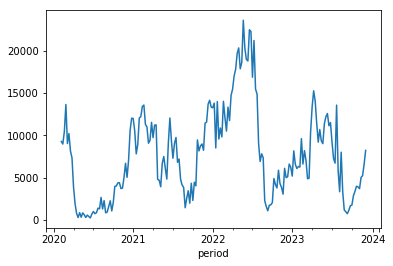

In [54]:
pd.to_numeric(sorted_data['inc'][-200:]).plot()

In [59]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [60]:
 year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = pd.to_numeric(sorted_data['inc'][week1:week2-1])
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

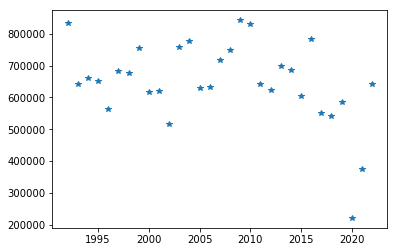

In [61]:
yearly_incidence.plot(style='*')

In [62]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

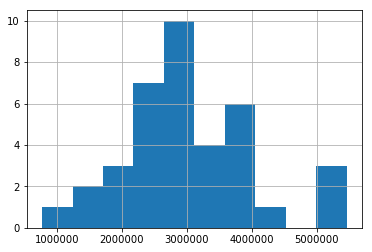

In [43]:
 yearly_incidence.hist()